This model uses inbuilt sentiment score analyzer and vaders model


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [ ]:
all_reviews = []
for page_num in range(1,3):
    url_source = 'https://www.techpowerup.com/review/?category=Processors&manufacturer=Intel&pp=1000&order=author'
    url = url_source.format(page_num=page_num)
    r=requests.get(url)
    soup=BeautifulSoup(r.content,'lxml')
    reviews = soup.find_all('p',{'class':"reviewlist"})
    div_reviews= soup.find_all('div',{'class':"teaser"})
    review2=' '
    for review in reviews:
        review2 += review.text.strip() + '\n'
    for div_review in div_reviews:
        review2 +=div_review.text.strip() + '\n'
    all_reviews.append(review2)
print(all_reviews)



[' Although not the unlocked chip most of us are waiting for, the Intel Core i7-4790 is the new kid on the block, sporting a fancy 4.0 GHz boost clock right out of the box. I put it through the paces to see what\'s what only to come to the same conclusions as most other sites. But here\'s my take on the Intel Core i7-4790 anyway.\nWhen Intel Core Duo hit the stores, people went crazy. Many wanted to experience the amazing performance for themselves. Now, Intel brings us the QX6700 - a quad-core CPU. Is another revolution about to take place? Or are we going to find just a small increase compared to dual core? What about single threaded applications? Multi-core scaling?\nWe compare the top two Intel Haswell processors Core i5-4670K and Core i7-4770K at stock and overclocked. Ivy Bridge results are included, too, to determine whether an upgrade makes sense. We also did a run with liquid nitrogen, resulting in maximum clocks of over 6 GHz.\nIntel\'s latest Ivy Bridge processors promise ex

In [ ]:
import re
import csv

def clean_text(text):
    # Remove emojis
    text = re.sub(r'[^\w\s,.!?\n]', '', text)
    # Remove 'READ MORE' and extra spaces
    text = re.sub(r'\s*READ MORE\s*', '', text)

    return text

reviews = (all_reviews)

cleaned_reviews = [clean_text(review) for review in reviews]
print(cleaned_reviews)

[' Although not the unlocked chip most of us are waiting for, the Intel Core i74790 is the new kid on the block, sporting a fancy 4.0 GHz boost clock right out of the box. I put it through the paces to see whats what only to come to the same conclusions as most other sites. But heres my take on the Intel Core i74790 anyway.\nWhen Intel Core Duo hit the stores, people went crazy. Many wanted to experience the amazing performance for themselves. Now, Intel brings us the QX6700  a quadcore CPU. Is another revolution about to take place? Or are we going to find just a small increase compared to dual core? What about single threaded applications? Multicore scaling?\nWe compare the top two Intel Haswell processors Core i54670K and Core i74770K at stock and overclocked. Ivy Bridge results are included, too, to determine whether an upgrade makes sense. We also did a run with liquid nitrogen, resulting in maximum clocks of over 6 GHz.\nIntels latest Ivy Bridge processors promise extra high perf

In [ ]:
import pandas as pd

# Data with IDs and reviews
reviews_with_ids = [
    {'ID': 1, 'REVIEWS': 'Although not the unlocked chip most of us are waiting for, the Intel Core i7-4790 is the new kid on the block, sporting a fancy 4.0 GHz boost clock right out of the box. I put it through the paces to see whats what only to come to the same conclusions as most other sites. But heres my take on the Intel Core i7-4790 anyway.'},
    {'ID': 2, 'REVIEWS': 'When Intel Core Duo hit the stores, people went crazy. Many wanted to experience the amazing performance for themselves. Now, Intel brings us the QX6700 - a quad-core CPU. Is another revolution about to take place? Or are we going to find just a small increase compared to dual core? What about single threaded applications? Multi-core scaling?'},
    {'ID': 3, 'REVIEWS': 'We compare the top two Intel Haswell processors Core i5-4670K and Core i7-4770K at stock and overclocked. Ivy Bridge results are included, too, to determine whether an upgrade makes sense. We also did a run with liquid nitrogen, resulting in maximum clocks of over 6 GHz.'},
    {'ID': 4, 'REVIEWS': 'Intels latest Ivy Bridge processors promise extra high performance in every sector (gaming, encoding, etc.). Today, we will compare the performance of the most popular models: the Core i5-3570K and the Core i7-3770K, at stock and overclocked.'},
    {'ID': 5, 'REVIEWS': 'In this review we compare the latest top Haswell processor Core i7-4770K against two unlocked Ivy Bridge CPUs. We test synthetic performance, real-life computing performance and gaming.'},
    {'ID': 6, 'REVIEWS': 'We review the Haswell-E lineup by pitting all its processors against each other and the Ivy Bridge-E Intel Core i7-4960X, Haswell Refresh Intel Core i7-4790K, and Haswell Intel Core i7-4770K. If you are looking to build a high-end gaming PC, or are looking to upgrade, then look no further: This review will tell you which CPU you will want to get to cover your needs.'},
    {'ID': 7, 'REVIEWS': 'Intel released the Intel Core i7-4790K, which created quite the stir with Intel Core i7-4770K owners. Does the Intel Core i7-4790K outperform the Intel Core i7-4770K in every way or does it fall a little flat? If you already own a 4770K, is the upgrade worth it?'},
    {'ID': 8, 'REVIEWS': 'Intel continues to upgrade their processor lineup with the Pentium E6300. It offers a high stock frequency at 2.80 GHz and improved memory bandwidth due to increased FSB to 1066 MHz, this makes this processor a formidable opponent but the question remains. Can it do any damage to AMDs triple core Athlon II X3 Series?'},
    {'ID': 9, 'REVIEWS': 'Intels new Core i5 661 processor combines graphics controller, memory controller, PCI-Express interface and a Dual Core all inside one compact processor package. Utilizing Intels latest 32 nm process there is quite some added potential for power saving and overclocking, but is the integrated chipset up to the task too?'},
    {'ID': 10, 'REVIEWS': 'After the imbalanced and overpriced Core i5 600 series Intel is making yet another step to deliver their Westmere architecture to the average user via Core i3 processors. Packed with Hyper Threading with lower frequencies and no Turbo Boost compared to i5 600 models, Core i3 530 and 540 got a tough task replacing Core 2 E7x00/E8x00 and put some pressure on AMDs cheap quad and triple core processors.'},
    {'ID': 11, 'REVIEWS': 'Intel mainstream CPUs have had a bottleneck in cooling due to poor heat transfer from the CPU die to the integrated heat spreader. Thanks to new de-lidding friendly tools released recently, it is now easier than ever before to handle this yourself and get a cooler running CPU. We examine two such solutions from Rockit Cool and Aqua Computer today, both of which promise fool-proof de-lidding and re-lidding.'},
    {'ID': 12, 'REVIEWS': 'The Intel Alder Lake platform has support for both DDR5 and DDR4 memory. We ran 38 application benchmarks and 10 games at multiple DDR4 configurations to learn what performance to expect when using DDR4 vs. DDR5 on 12th Gen, and whether theres a point at which DDR4 performance can beat the much more expensive DDR5.'},
    {'ID': 13, 'REVIEWS': 'Intels recently-released Core i5-8600 comes with an identical boost frequency as the i5-8600K, for a lesser price that happens to match that of the Ryzen 5 2600X. While base frequency might look low with 3.1 GHz, in reality, out of the box, the processor runs above 4 GHz all the time.'},
    {'ID': 14, 'REVIEWS': 'Intels Pentium Gold G5600 processor features HyperThreading, which turns its two cores into four threads. The result is one of the most affordable entry-level CPUs that is fit for gaming. Tough competition comes in form of the AMD Ryzen 2200G, which is similarly priced, but offers four real cores.'},
    {'ID': 15, 'REVIEWS': 'Intel made it clear that their 12th Gen Alder Lake Hybrid processor architecture works best with Windows 11. We wanted to see what happens when you run the new Core i9-12900K processor on Windows 10 and tested 37 applications and 10 games at 720p, 1080p, 1440p, and 4K.'},
    {'ID': 16, 'REVIEWS': 'Intels $200 Core i5-8500 is part of the second wave of Coffee Lake CPUs, released earlier this year. The processor comes with six cores and six threads and will boost up to 4.1 GHz. Our testing shows that even at higher thread counts, it wont ever go below 3.9 GHz, which will make life difficult for the Ryzen 5 2600 - its main competitor.'},
    {'ID': 17, 'REVIEWS': 'With Alder Lake, Intel is betting big on hybrid CPU core configurations. The Core i9-12900K has eight P(erformance) cores and eight E(fficient) cores. We were curious and tested the processor running the E-Cores only to see how well they perform against architectures like Zen 2, Zen 3, Skylake, Comet Lake, and Rocket Lake.'},
    {'ID': 18, 'REVIEWS': 'With the Core i9-13900K, Intel delivers impressive performance. Our in-depth review confirms: Raptor Lake is the worlds fastest CPU for gaming. Even in applications the processor is able to match AMDs Zen 4 Ryzen 9 7950X flagship. If only power consumption wasnt so high...'},
    {'ID': 19, 'REVIEWS': 'Core i5-13600K is a gamers dream! The new processor achieves gaming numbers that match the best AMD Zen 4 offerings, at a much more competitive $320 price point. Our review also shows that 13600K can shine in applications, beating the much higher positioned Core i7-12700K.'},
    {'ID': 20, 'REVIEWS': 'Intels Core i9-10900K achieves highly impressive gaming performance thanks to its 10-core/20-thread design with up to 5.3 GHz. We compare three configurations in our 10900K review: all stock, boost limits removed, and a manual 5.1 GHz all-core overclock.'},
    {'ID': 21, 'REVIEWS': 'The Core i5-10600K is Intels biggest upgrade in the mid-range for years. Driven by strong competition from AMD Intel is now giving us a 6c/12t CPU with 125 W TDP and the full compliment of 12 MB cache. Our Core i5-10600K benchmarks show it to be a formidable performer, especially in gaming'},
    {'ID': 22, 'REVIEWS': 'With the Core i7-13700K, Intel has built a formidable jack-of-all-trades processor. Our review confirms that it offers fantastic application performance, beating the more expensive Ryzen 9 7900X, and in gaming it gets you higher FPS than any AMD processor ever released, delivering an experience very similar to the Core i9-13900K.'},
    {'ID': 23, 'REVIEWS':  'The Intel Core i9-13900KS is the fastest CPU that Intel is offering this generation. Our review confirms that its clock speeds reach 6.0 GHz, but power consumption also sets a new record. Hows gaming performance vs 7800X3D and 7950X3D? Our review has the answers.'},
    {'ID': 24, 'REVIEWS':  'Intels new Core i5-10400F offers a large performance jump over the previous generation Core i5-9400F because of its six-core/twelve-thread design. In this Core i5-10400F review we also test the feasibility of overclocking through BCLK, or by relaxing the PL1 and PL2 Turbo Limits.' },
    {'ID': 25, 'REVIEWS':  'Intels Core i3-10100 is the most affordable Comet Lake "Core" processor. Unlike its predecessor, it finally has HyperThreading, which brings the core configuration to 4c/8t. Our Core i3-10100 review takes a close look at how Intels new budget offering performs against AMD Ryzen 3 3100 and 3300X.'},
    {'ID': 26, 'REVIEWS':  'The Intel Core i3-10300 rewards you with 2 MB of additional L3 cache and higher clocks for $20 over the Core i3-10100. Is the upgrade worth it? In our Core i3-10300 review well also check if the more affordable AMD Ryzen 3 3300X is the better choice.'},
    {'ID': 27, 'REVIEWS':  'In this article, we take a closer look at the performance scaling you can expect for various DDR5 configurations. We test from DDR5-6000 all the way down to DDR5-2400 and compare CL30 vs. CL36 vs. CL40. Last but not least, we also consider these numbers in relation to what DDR4-3600 offers.'},
    {'ID': 28, 'REVIEWS':  'In our Intel Core i7-10700 review, were taking a look at one of Intels most affordable 8-core/16-thread processors. Its low TDP of 65 W makes it power-efficient, but also limits performance. We unlocked that limit and gained up to 30% real-life performance without ever risking an unstable system.'},
    {'ID': 29, 'REVIEWS':  'The Intel Core i3-8300 was released recently as part of Intels second wave of Coffee Lake processors. Compared to the i3-8100, it adds 100 MHz to the CPU clock and 2 MB of cache. It lacks the unlocked multiplier of Ryzen, and its integrated graphics are not nearly as fast as those of Ryzen G models. Is it still a good option in the $150 CPU market?'},
    {'ID': 30, 'REVIEWS':  'The Core i5-10500 is Intels $200 response to the Ryzen 5 3600 and 3600X. It boosts up to 4.5 GHz more reliably than other Comet Lake CPUs, and gaming performance is excellent, too. Our Core i5-10500 review will also answer whether the Core i5-10500 is worth it over the i5-10400F.'},
    {'ID': 31, 'REVIEWS':  'The Core i7-10700K is Intels second strongest overclockable Comet Lake CPU, with a powerful 8c/16t configuration. We saw pretty amazing tweaking potential from the 10700 non-K, so well definitely compare against that in the Core i7-10700K review, and of course against AMDs Ryzen 9 3900X.'},
    {'ID': 32, 'REVIEWS': 'The Core i9-9900KS is Intels new consumer flagship processor. It runs at 5 GHz boost no matter how many cores are active, which translates into 10% application performance gained over the 9900K. Gaming performance is improved too, but pricing is high, especially compared to what AMD is offering.'} ,
    {'ID': 33, 'REVIEWS':  'We test Intels Core i9-12900K at various TDP levels all the way down to 50 W to determine how much efficiency is really in the new Alder Lake core, and how these power limits affect performance. Competing with the efficiency of AMDs Zen 3 Ryzen lineup is just two settings changes away.'},
    {'ID': 34, 'REVIEWS':   'The Intel Core i3-10320 is just $10 more expensive than the Core i3-10300, and offers +200 MHz Boost and +100 MHz base clock. Well check whether the extra cost is worth it, and also compare the Core i3-10320 to the AMD Ryzen 3 3300X and Core i5-10400F.'},
    {'ID': 35, 'REVIEWS':  'In this weeks TPU50 Megabench were testing whether you can unlock additional gaming performance by disabling the E-Cores on a Raptor Lake Core i9-13900K processor. For our benchmarks we used the mighty GeForce RTX 4090, with 53 games at three resolutions.'},
    {'ID': 36, 'REVIEWS':  'In our Core i9-10900 review were taking a close look at what can be gained from unlocking the power limit of this 65 W processor. Results are impressive: up to 40% faster apps and performance that rivals the Core i9-10900K at much lower pricing, but heat output is increased, too.'},
    {'ID': 37, 'REVIEWS':  'The Intel Core i5-7640X provides an entry into the world of HEDT for below $300. However, Intel cut several corners in carving out the Core i5-7640X, among which are the lack of HT, fewer PCIe lanes, and no quad-channel memory. Are there redeeming qualities to this chip after all?'},
    {'ID': 38, 'REVIEWS': 'The Intel Core i5-12400F comes at an extremely attractive price point, yet offers performance comparable to AMDs Ryzen 5 5600X. While Intel introduced a Hybrid core design with Alder Lake, the 12400F is a P-core only design, which helps avoid potential compatibility issues with E-cores.'},
    {'ID': 39, 'REVIEWS':  'Intel strikes back! The Core i7-8700K comes with six processor cores, plus HyperThreading, for a total of twelve threads. Overclocking potential is excellent, reaching 5 GHz on all cores, with ease, on just air cooling. Pricing is also extremely reasonable, with just a small increase over the previous quad-core 7700K.'},
    {'ID': 40, 'REVIEWS': 'Core i3-12100F is the most affordable quad-core Alder Lake CPU from Intel. In our review, we test with DDR4 and DDR5 to see whether it has what it takes to build a lean work PC or cost-efficient gaming machine. Thanks to BCLK overclocking, we even managed to overclock it to 5.2 GHz all-core.'},
    {'ID': 41, 'REVIEWS': 'We take a close look at memory speeds, latencies, and command rate on Intels latest Core i7-8700K with Z370. Scenarios tested include fail-safe 2133 MHz, the platform default of 2666 MHz, and overclocked memory speeds ranging from 3000 MHz to 4000 MHz - at various timings.'},
    {'ID': 42, 'REVIEWS': 'Intels Core i5-8600K is priced $120 below the i7-8700K, making it an interesting option for the more value-oriented buyer. It features the same six-core design, but lacks HyperThreading and loses 3 MB of cache. Our testing shows that it still is a great CPU, especially when overclocked to almost 5 GHz.'},
    {'ID': 43, 'REVIEWS': 'The Core i5-8400 is Intels most affordable option to go beyond a quad-core setup on the desktop. With a price point of $190, it is only half the price of Core i7-8700K, but delivers nearly the same performance in games and can also compete with the Ryzen 6c12t processors thanks to its good single-threaded performance and high boost clock.'},
    {'ID': 44, 'REVIEWS': 'The Core i3-8350K is the first quad-core CPU in Intels i3 arsenal, priced at $180 and clocked at 4 GHz, even when all four cores are active. Overclocking is extremely easy due to the "K" suffix and has the potential to turn this processor into a budget overclockers dream.'},
    {'ID': 45, 'REVIEWS': 'Intels Core i3-12300 is reasonably priced at $160 and offers the best i3 performance yet. In our review, we found this 4c/8t processor to offer good application and gaming performance thanks to the new Golden Cove cores, and the lack of E-cores can actually be a good thing as it eliminates compatibility issues completely.'},
    {'ID': 46, 'REVIEWS': 'Intels new Core processors based on the Sandy Bridge Architecture have been released. They bring a new integrated graphics core that effectively doubles rendering power compared to the last generation. It also includes numerous new features geared to both the gamer and consumer.'},
    {'ID': 47, 'REVIEWS': 'The Intel Core i9-11900K is the companys Rocket Lake flagship. It uses the new Cypress Cove architecture and includes support for new instruction sets like AVX512 and DLBoost to speed up AI calculations. We run the processor through our new test suite and also take a closer look at gaming performance, including frametimes.'},
    {'ID': 48, 'REVIEWS': 'The Intel Core i9-10850K is the companys latest Comet Lake processor. Its just 100 MHz slower than the Core i9-10900K flagship, but much more affordable, and with better availability. In our i9-10850K review, were taking a close look at both gaming and application performance to determine whether its a good alternative to the i9-10900K.'},
    {'ID': 49, 'REVIEWS': 'The Core i5-11600K is Intels mid-range entry using the Rocket Lake architecture. Our review confirms that it is a great alternative to AMDs overpriced Ryzen 5 5600X, offering similar performance at almost $100 less. The i5-11660K is also fast enough to compete with last generations 8-core i7-10700K.'},
    {'ID': 50, 'REVIEWS': 'The Core i5-11400F is Intels most affordable Rocket Lake processor. While its multiplier is locked, you can still adjust the power limit. Once we did that, the CPU ran over 15% faster and almost matched the Core i5-11600K. We also made an interesting discovery regarding Gear 1 vs. Gear 2.'},
    {'ID': 51, 'REVIEWS': 'The Intel Core i9-14900KS reaches impressive clock frequencies up to 6.2 GHz, which yields remarkable performance in applications and gaming. However, this comes at the cost of serious power consumption, especially if you go beyond stock, where we saw over 500 W during testing.'},
    {'ID': 52, 'REVIEWS': 'The Core i9-7900X is where Intels new HEDT processor lineup truly begins, delivering on all the platforms three main goals - more cores, more memory channels, and more PCIe lanes. We pit it against the Ryzen Threadripper 1950X for what will be the pitched battle of the $1000 giants.'},
    {'ID': 53, 'REVIEWS': 'The Intel Core i5-12600 doesnt have any E-cores, which makes it a fundamentally different processor than the Core i5-12600K, and thus very different than the naming would suggest. The Core i5-12600 is actually the fastest non-hybrid Alder Lake processor you can buy, but should you?'},
    {'ID': 54, 'REVIEWS': 'Today, Intel released their new flagship processor for the LGA 1151 platform. The Core i9-9900K finally comes with eight core and 16 threads, reaching parity with AMDs Ryzen offerings. Maximum Boost Clock has been increased as well, now to a staggering 5 GHz.'},
    {'ID': 55, 'REVIEWS': 'Intels new Kaby Lake processors were just launched. We compare the Core i7-7700K to the i7-6700K, both stock and overclocked, to investigate the performance gains using AMDs Radeon RX 480 and NVIDIAs GTX 1080 in 22 games at three resolutions.'},
    {'ID': 56, 'REVIEWS': 'Intels Core i7-9700K comes with eight cores, but lacks HyperThreading. In our testing, it still conclusively beats the 6-core/12-thread Core i7-8700K. The much more expensive Core i9-9900K is also under heavy attack: it seems the Core i7-9700K actually is the better gaming CPU.'},
    {'ID': 57, 'REVIEWS': 'The Intel Core i7-11700KF has the same 8-core/16-thread configuration as the much more expensive Core i9-11900K, which it can almost match out of the box, and beat with a little bit of tweaking. Thanks to its very reasonable price point of only $390, the 11700KF could also be a tempting alternative to the Ryzen 5 5600X or Ryzen 7 5800X.'},
    {'ID': 58, 'REVIEWS': 'Today Intel is taking the wraps off their Meteor Lake Architecture. Our tech preview tells you everything you need to know about Intels new ideas that will power the companys processors for years to come. Just like AMD, Intel is betting on chiplets, which combine multiple silicon dies into a single CPU to build faster, more-energy efficient designs that are cheaper to manufacture.'},
    {'ID': 59, 'REVIEWS': 'The Intel Core i5-13400F is only $200, but comes with six Performance Cores and four E-Cores, bringing the total thread count to 16. Performance is good, as expected, but whats even more impressive is the energy efficiency as confirmed by the detailed testing in our review.'},
    {'ID': 60, 'REVIEWS': 'Intels Core 14th Gen "Raptor Lake Refresh" processors are launching soon. Today marks the end of the unboxing and preview embargo, and were excited to share hands-on pictures of the new processors with you. Additionally, well discuss the latest technologies and features they bring to the table'},
    {'ID': 61, 'REVIEWS': 'Core i9-14900K is Intels new flagship with clock speeds of up to 6 GHz. Its actually clocked even higher than the 13900KS, thanks to an extra 100 MHz when more than two cores are active. Our review confirms that Raptor Lake Refresh is amazing for both applications and gaming, if you can live with the power consumption.'},
    {'ID': 62, 'REVIEWS': 'Intel Core i7-14700K is the only processor released today with an upgraded core configuration. Thanks to an additional four E-Cores, more cache and a 200 MHz frequency bump, the 14700K reaches performance quite close to the 13900K, at much better pricing.'},
    {'ID': 63, 'REVIEWS': 'Intel Core i5-14600K is the most affordable new processor released today. While it may look weaker on paper it still packs an impressive punch, especially for gaming. In our review we reached an impressive 5.7 GHz on all cores, which unlocks quite a bit of additional performance.'},
    {'ID': 64, 'REVIEWS': 'The Core i5-9600K may not have the core-count increases of its higher-priced siblings, but it received a healthy frequency bump over its predecessor, coupled with hardware patches to some vulnerabilities. We already proved that the i7-9700K is the best gaming CPU by Intel. Can the humble Core i5 challenge it in this arena?'},
    {'ID': 65, 'REVIEWS': 'Intel today unveiled its ambitious Lunar Lake microarchitecture, which takes the fight to the likes of the Apple M3, the Snapdragon X Elite, and more, bringing high end AI PC experiences within an ultraportable footprint, with smartphone-like battery life and availability. We have all the technical details.'},
    {'ID': 66, 'REVIEWS': 'Intel has just announced their new 12th Gen Alder Lake processors. These bring with them the biggest change to the x86 ecosystem since 64-bit was introduced. Alder Lake is comprised of highly efficient E-Cores and fast P-Cores. Well explain all this in our Alder Lake preview and also give you the details on DDR5 and PCI-Express 5.0.'},
    {'ID': 67, 'REVIEWS': 'Theres no denying that Intels Core i9-14900K is a power hog. This article examines the power, performance and thermals effects of limiting its power consumption, with very interesting results. Additionally, we investigate undervolting to determine if efficiency can be optimized even further.'},
    {'ID': 68, 'REVIEWS': 'The Intel Core i9-12900KS is the companys new flagship Alder Lake processor. After our review, we can confirm that it is the worlds fastest gaming CPU, but that comes at a price not only in terms of dollars, but increased power draw and heat output, too.'},
    {'ID': 69, 'REVIEWS': 'The Intel Core i9-12900K is Intels flagship processor for the Alder Lake architecture. In our testing, we saw fantastic gaming performance from this new processor. Not only low-threaded tests have improved, the 12900K can even beat AMD at highly threaded workloads.'},
    {'ID': 70, 'REVIEWS': 'With the Core i7-12700K, Intel has released a formidable competitor to AMDs Ryzen 5800X and even 5900X. Thanks to eight powerful Golden Cove cores, the processor handles all workloads very well, including gaming. Compared to the i9-12900K, it runs almost as fast, but much cooler, with better efficiency.'},
    {'ID': 71, 'REVIEWS': 'The Core i5-12600K is the price/performance king in the Intel Alder Lake lineup. With its competitive pricing of $300, its a clear winner against AMDs Ryzen 5 5600X and faster than even the 5800X in many applications and games. This is the gaming CPU you want.'} ,
    ]

# Create a DataFrame
df = pd.DataFrame(reviews_with_ids)

# Define the path where you want to save the CSV file
csv_file = 'reviews_with_named_columns.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False, encoding='utf-8')

print(f'CSV file "{csv_file}" has been created successfully.')


CSV file "reviews_with_named_columns.csv" has been created successfully.


In [ ]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
df=pd.read_csv("/content/reviews_with_named_columns.csv")
stop_words = set(stopwords.words('english'))
vader = SentimentIntensityAnalyzer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pattern = r'[^A-Za-z\s]+'
output_df=pd.DataFrame(columns=["ID","REVIEWS","POSITIVE_SCORE","SENTIMENT","SUBJECTIVITY_SCORE"])
for index,row in df.iterrows():
    ID=row["ID"]
    REVIEWS=row["REVIEWS"]
    cleaned_text= re.sub(pattern,' ',REVIEWS)
    words = nltk.word_tokenize(cleaned_text)
    words=[word.lower() for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(words)
    scores = vader.polarity_scores(cleaned_text)
    scores["compound"]=scores["pos"] - scores["neg"]
    blob = TextBlob(cleaned_text)
    polarity_score=blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity
    output_df = pd.concat([output_df,pd.DataFrame({"ID":ID,"REVIEWS":REVIEWS,"POSITIVE_SCORE":scores["pos"],"NEGATIVE_SCORE":scores["neg"],"SENTIMENT":scores["compound"],"SUBJECTIVITY_SCORE": subjectivity_score},index=[0])])

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize Vader sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Example DataFrame `df` (you should have this already defined)
df = pd.DataFrame(reviews_with_ids)

# Initialize an empty list to store rows
rows_list = []

# Define stop words and pattern for cleaning text
stop_words = set(stopwords.words('english'))
pattern = r'[^A-Za-z\s]+'

# Process each row in the original DataFrame `df`
for index, row in df.iterrows():
    ID = row["ID"]
    REVIEWS = row["REVIEWS"]

    # Clean the text
    cleaned_text = re.sub(pattern, ' ', REVIEWS)
    words = word_tokenize(cleaned_text)
    words = [word.lower() for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(words)

    # Perform sentiment analysis using VADER
    scores = vader.polarity_scores(cleaned_text)
    sentiment_score = scores["pos"] - scores["neg"]

    # Perform sentiment analysis using TextBlob
    blob = TextBlob(cleaned_text)
    subjectivity_score = blob.sentiment.subjectivity

    # Append processed data as a dictionary to rows_list
    rows_list.append({
        "ID": ID,
        "REVIEWS": REVIEWS,
        "POSITIVE_SCORE": scores["pos"],
        "NEGATIVE_SCORE": scores["neg"],
        "SENTIMENT": sentiment_score,
        "SUBJECTIVITY_SCORE": subjectivity_score
    })

# Create a DataFrame from rows_list
output_df = pd.DataFrame(rows_list)

# Print the resulting DataFrame
print(output_df)
output_df.to_csv('output_reviews.csv', index=False)



    ID                                            REVIEWS  POSITIVE_SCORE  \
0    1  Although not the unlocked chip most of us are ...           0.083   
1    2  When Intel Core Duo hit the stores, people wen...           0.144   
2    3  We compare the top two Intel Haswell processor...           0.065   
3    4  Intels latest Ivy Bridge processors promise ex...           0.195   
4    5  In this review we compare the latest top Haswe...           0.087   
5    6  We review the Haswell-E lineup by pitting all ...           0.040   
6    7  Intel released the Intel Core i7-4790K, which ...           0.157   
7    8  Intel continues to upgrade their processor lin...           0.143   
8    9  Intels new Core i5 661 processor combines grap...           0.000   
9   10  After the imbalanced and overpriced Core i5 60...           0.061   
10  11  Intel mainstream CPUs have had a bottleneck in...           0.257   
11  12  The Intel Alder Lake platform has support for ...           0.078   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
output_df.shape


(71, 6)

In [ ]:
output_df['SENTIMENT'].value_counts()

SENTIMENT
 0.000    4
 0.264    2
 0.171    2
-0.006    2
 0.199    2
         ..
 0.317    1
 0.493    1
 0.393    1
 0.156    1
 0.343    1
Name: count, Length: 64, dtype: int64

<Axes: xlabel='SENTIMENT', ylabel='Count'>

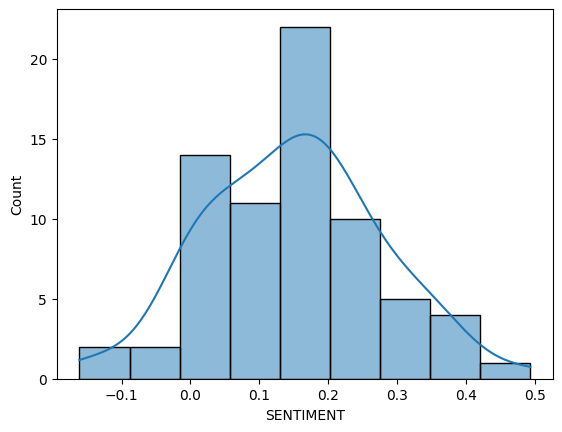

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(output_df['SENTIMENT'],kde=True)


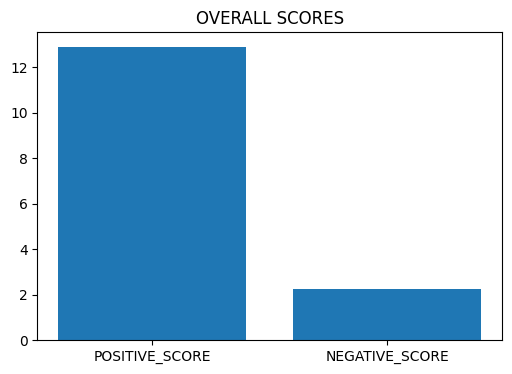

In [ ]:
# to sum the positive amd negative scores
positive_sum=output_df['POSITIVE_SCORE'].sum()
negative_sum=output_df['NEGATIVE_SCORE'].sum()
#create a bar chart
plt.figure(figsize=(6,4))
plt.title('OVERALL SCORES')
plt.bar(['POSITIVE_SCORE','NEGATIVE_SCORE'],[positive_sum,negative_sum])
plt.show()

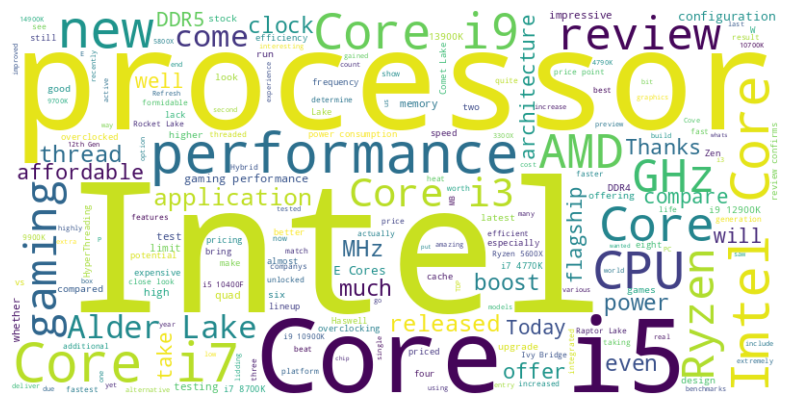

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Example DataFrame `output_df` (replace with your actual data)
output_df = pd.DataFrame([
    {'ID': 1, 'REVIEWS': 'Although not the unlocked chip most of us are waiting for, the Intel Core i7-4790 is the new kid on the block, sporting a fancy 4.0 GHz boost clock right out of the box. I put it through the paces to see whats what only to come to the same conclusions as most other sites. But heres my take on the Intel Core i7-4790 anyway.'},
    {'ID': 2, 'REVIEWS': 'When Intel Core Duo hit the stores, people went crazy. Many wanted to experience the amazing performance for themselves. Now, Intel brings us the QX6700 - a quad-core CPU. Is another revolution about to take place? Or are we going to find just a small increase compared to dual core? What about single threaded applications? Multi-core scaling?'},
    {'ID': 3, 'REVIEWS': 'We compare the top two Intel Haswell processors Core i5-4670K and Core i7-4770K at stock and overclocked. Ivy Bridge results are included, too, to determine whether an upgrade makes sense. We also did a run with liquid nitrogen, resulting in maximum clocks of over 6 GHz.'},
    {'ID': 4, 'REVIEWS': 'Intels latest Ivy Bridge processors promise extra high performance in every sector (gaming, encoding, etc.). Today, we will compare the performance of the most popular models: the Core i5-3570K and the Core i7-3770K, at stock and overclocked.'},
    {'ID': 5, 'REVIEWS': 'In this review we compare the latest top Haswell processor Core i7-4770K against two unlocked Ivy Bridge CPUs. We test synthetic performance, real-life computing performance and gaming.'},
    {'ID': 6, 'REVIEWS': 'We review the Haswell-E lineup by pitting all its processors against each other and the Ivy Bridge-E Intel Core i7-4960X, Haswell Refresh Intel Core i7-4790K, and Haswell Intel Core i7-4770K. If you are looking to build a high-end gaming PC, or are looking to upgrade, then look no further: This review will tell you which CPU you will want to get to cover your needs.'},
    {'ID': 7, 'REVIEWS': 'Intel released the Intel Core i7-4790K, which created quite the stir with Intel Core i7-4770K owners. Does the Intel Core i7-4790K outperform the Intel Core i7-4770K in every way or does it fall a little flat? If you already own a 4770K, is the upgrade worth it?'},
    {'ID': 8, 'REVIEWS': 'Intel continues to upgrade their processor lineup with the Pentium E6300. It offers a high stock frequency at 2.80 GHz and improved memory bandwidth due to increased FSB to 1066 MHz, this makes this processor a formidable opponent but the question remains. Can it do any damage to AMDs triple core Athlon II X3 Series?'},
    {'ID': 9, 'REVIEWS': 'Intels new Core i5 661 processor combines graphics controller, memory controller, PCI-Express interface and a Dual Core all inside one compact processor package. Utilizing Intels latest 32 nm process there is quite some added potential for power saving and overclocking, but is the integrated chipset up to the task too?'},
    {'ID': 10, 'REVIEWS': 'After the imbalanced and overpriced Core i5 600 series Intel is making yet another step to deliver their Westmere architecture to the average user via Core i3 processors. Packed with Hyper Threading with lower frequencies and no Turbo Boost compared to i5 600 models, Core i3 530 and 540 got a tough task replacing Core 2 E7x00/E8x00 and put some pressure on AMDs cheap quad and triple core processors.'},
    {'ID': 11, 'REVIEWS': 'Intel mainstream CPUs have had a bottleneck in cooling due to poor heat transfer from the CPU die to the integrated heat spreader. Thanks to new de-lidding friendly tools released recently, it is now easier than ever before to handle this yourself and get a cooler running CPU. We examine two such solutions from Rockit Cool and Aqua Computer today, both of which promise fool-proof de-lidding and re-lidding.'},
    {'ID': 12, 'REVIEWS': 'The Intel Alder Lake platform has support for both DDR5 and DDR4 memory. We ran 38 application benchmarks and 10 games at multiple DDR4 configurations to learn what performance to expect when using DDR4 vs. DDR5 on 12th Gen, and whether theres a point at which DDR4 performance can beat the much more expensive DDR5.'},
    {'ID': 13, 'REVIEWS': 'Intels recently-released Core i5-8600 comes with an identical boost frequency as the i5-8600K, for a lesser price that happens to match that of the Ryzen 5 2600X. While base frequency might look low with 3.1 GHz, in reality, out of the box, the processor runs above 4 GHz all the time.'},
    {'ID': 14, 'REVIEWS': 'Intels Pentium Gold G5600 processor features HyperThreading, which turns its two cores into four threads. The result is one of the most affordable entry-level CPUs that is fit for gaming. Tough competition comes in form of the AMD Ryzen 2200G, which is similarly priced, but offers four real cores.'},
    {'ID': 15, 'REVIEWS': 'Intel made it clear that their 12th Gen Alder Lake Hybrid processor architecture works best with Windows 11. We wanted to see what happens when you run the new Core i9-12900K processor on Windows 10 and tested 37 applications and 10 games at 720p, 1080p, 1440p, and 4K.'},
    {'ID': 16, 'REVIEWS': 'Intels $200 Core i5-8500 is part of the second wave of Coffee Lake CPUs, released earlier this year. The processor comes with six cores and six threads and will boost up to 4.1 GHz. Our testing shows that even at higher thread counts, it wont ever go below 3.9 GHz, which will make life difficult for the Ryzen 5 2600 - its main competitor.'},
    {'ID': 17, 'REVIEWS': 'With Alder Lake, Intel is betting big on hybrid CPU core configurations. The Core i9-12900K has eight P(erformance) cores and eight E(fficient) cores. We were curious and tested the processor running the E-Cores only to see how well they perform against architectures like Zen 2, Zen 3, Skylake, Comet Lake, and Rocket Lake.'},
    {'ID': 18, 'REVIEWS': 'With the Core i9-13900K, Intel delivers impressive performance. Our in-depth review confirms: Raptor Lake is the worlds fastest CPU for gaming. Even in applications the processor is able to match AMDs Zen 4 Ryzen 9 7950X flagship. If only power consumption wasnt so high...'},
    {'ID': 19, 'REVIEWS': 'Core i5-13600K is a gamers dream! The new processor achieves gaming numbers that match the best AMD Zen 4 offerings, at a much more competitive $320 price point. Our review also shows that 13600K can shine in applications, beating the much higher positioned Core i7-12700K.'},
    {'ID': 20, 'REVIEWS': 'Intels Core i9-10900K achieves highly impressive gaming performance thanks to its 10-core/20-thread design with up to 5.3 GHz. We compare three configurations in our 10900K review: all stock, boost limits removed, and a manual 5.1 GHz all-core overclock.'},
    {'ID': 21, 'REVIEWS': 'The Core i5-10600K is Intels biggest upgrade in the mid-range for years. Driven by strong competition from AMD Intel is now giving us a 6c/12t CPU with 125 W TDP and the full compliment of 12 MB cache. Our Core i5-10600K benchmarks show it to be a formidable performer, especially in gaming'},
    {'ID': 22, 'REVIEWS': 'With the Core i7-13700K, Intel has built a formidable jack-of-all-trades processor. Our review confirms that it offers fantastic application performance, beating the more expensive Ryzen 9 7900X, and in gaming it gets you higher FPS than any AMD processor ever released, delivering an experience very similar to the Core i9-13900K.'},
    {'ID': 23, 'REVIEWS':  'The Intel Core i9-13900KS is the fastest CPU that Intel is offering this generation. Our review confirms that its clock speeds reach 6.0 GHz, but power consumption also sets a new record. Hows gaming performance vs 7800X3D and 7950X3D? Our review has the answers.'},
    {'ID': 24, 'REVIEWS':  'Intels new Core i5-10400F offers a large performance jump over the previous generation Core i5-9400F because of its six-core/twelve-thread design. In this Core i5-10400F review we also test the feasibility of overclocking through BCLK, or by relaxing the PL1 and PL2 Turbo Limits.' },
    {'ID': 25, 'REVIEWS':  'Intels Core i3-10100 is the most affordable Comet Lake "Core" processor. Unlike its predecessor, it finally has HyperThreading, which brings the core configuration to 4c/8t. Our Core i3-10100 review takes a close look at how Intels new budget offering performs against AMD Ryzen 3 3100 and 3300X.'},
    {'ID': 26, 'REVIEWS':  'The Intel Core i3-10300 rewards you with 2 MB of additional L3 cache and higher clocks for $20 over the Core i3-10100. Is the upgrade worth it? In our Core i3-10300 review well also check if the more affordable AMD Ryzen 3 3300X is the better choice.'},
    {'ID': 27, 'REVIEWS':  'In this article, we take a closer look at the performance scaling you can expect for various DDR5 configurations. We test from DDR5-6000 all the way down to DDR5-2400 and compare CL30 vs. CL36 vs. CL40. Last but not least, we also consider these numbers in relation to what DDR4-3600 offers.'},
    {'ID': 28, 'REVIEWS':  'In our Intel Core i7-10700 review, were taking a look at one of Intels most affordable 8-core/16-thread processors. Its low TDP of 65 W makes it power-efficient, but also limits performance. We unlocked that limit and gained up to 30% real-life performance without ever risking an unstable system.'},
    {'ID': 29, 'REVIEWS':  'The Intel Core i3-8300 was released recently as part of Intels second wave of Coffee Lake processors. Compared to the i3-8100, it adds 100 MHz to the CPU clock and 2 MB of cache. It lacks the unlocked multiplier of Ryzen, and its integrated graphics are not nearly as fast as those of Ryzen G models. Is it still a good option in the $150 CPU market?'},
    {'ID': 30, 'REVIEWS':  'The Core i5-10500 is Intels $200 response to the Ryzen 5 3600 and 3600X. It boosts up to 4.5 GHz more reliably than other Comet Lake CPUs, and gaming performance is excellent, too. Our Core i5-10500 review will also answer whether the Core i5-10500 is worth it over the i5-10400F.'},
    {'ID': 31, 'REVIEWS':  'The Core i7-10700K is Intels second strongest overclockable Comet Lake CPU, with a powerful 8c/16t configuration. We saw pretty amazing tweaking potential from the 10700 non-K, so well definitely compare against that in the Core i7-10700K review, and of course against AMDs Ryzen 9 3900X.'},
    {'ID': 32, 'REVIEWS': 'The Core i9-9900KS is Intels new consumer flagship processor. It runs at 5 GHz boost no matter how many cores are active, which translates into 10% application performance gained over the 9900K. Gaming performance is improved too, but pricing is high, especially compared to what AMD is offering.'} ,
    {'ID': 33, 'REVIEWS':  'We test Intels Core i9-12900K at various TDP levels all the way down to 50 W to determine how much efficiency is really in the new Alder Lake core, and how these power limits affect performance. Competing with the efficiency of AMDs Zen 3 Ryzen lineup is just two settings changes away.'},
    {'ID': 34, 'REVIEWS':   'The Intel Core i3-10320 is just $10 more expensive than the Core i3-10300, and offers +200 MHz Boost and +100 MHz base clock. Well check whether the extra cost is worth it, and also compare the Core i3-10320 to the AMD Ryzen 3 3300X and Core i5-10400F.'},
    {'ID': 35, 'REVIEWS':  'In this weeks TPU50 Megabench were testing whether you can unlock additional gaming performance by disabling the E-Cores on a Raptor Lake Core i9-13900K processor. For our benchmarks we used the mighty GeForce RTX 4090, with 53 games at three resolutions.'},
    {'ID': 36, 'REVIEWS':  'In our Core i9-10900 review were taking a close look at what can be gained from unlocking the power limit of this 65 W processor. Results are impressive: up to 40% faster apps and performance that rivals the Core i9-10900K at much lower pricing, but heat output is increased, too.'},
    {'ID': 37, 'REVIEWS':  'The Intel Core i5-7640X provides an entry into the world of HEDT for below $300. However, Intel cut several corners in carving out the Core i5-7640X, among which are the lack of HT, fewer PCIe lanes, and no quad-channel memory. Are there redeeming qualities to this chip after all?'},
    {'ID': 38, 'REVIEWS': 'The Intel Core i5-12400F comes at an extremely attractive price point, yet offers performance comparable to AMDs Ryzen 5 5600X. While Intel introduced a Hybrid core design with Alder Lake, the 12400F is a P-core only design, which helps avoid potential compatibility issues with E-cores.'},
    {'ID': 39, 'REVIEWS':  'Intel strikes back! The Core i7-8700K comes with six processor cores, plus HyperThreading, for a total of twelve threads. Overclocking potential is excellent, reaching 5 GHz on all cores, with ease, on just air cooling. Pricing is also extremely reasonable, with just a small increase over the previous quad-core 7700K.'},
    {'ID': 40, 'REVIEWS': 'Core i3-12100F is the most affordable quad-core Alder Lake CPU from Intel. In our review, we test with DDR4 and DDR5 to see whether it has what it takes to build a lean work PC or cost-efficient gaming machine. Thanks to BCLK overclocking, we even managed to overclock it to 5.2 GHz all-core.'},
    {'ID': 41, 'REVIEWS': 'We take a close look at memory speeds, latencies, and command rate on Intels latest Core i7-8700K with Z370. Scenarios tested include fail-safe 2133 MHz, the platform default of 2666 MHz, and overclocked memory speeds ranging from 3000 MHz to 4000 MHz - at various timings.'},
    {'ID': 42, 'REVIEWS': 'Intels Core i5-8600K is priced $120 below the i7-8700K, making it an interesting option for the more value-oriented buyer. It features the same six-core design, but lacks HyperThreading and loses 3 MB of cache. Our testing shows that it still is a great CPU, especially when overclocked to almost 5 GHz.'},
    {'ID': 43, 'REVIEWS': 'The Core i5-8400 is Intels most affordable option to go beyond a quad-core setup on the desktop. With a price point of $190, it is only half the price of Core i7-8700K, but delivers nearly the same performance in games and can also compete with the Ryzen 6c12t processors thanks to its good single-threaded performance and high boost clock.'},
    {'ID': 44, 'REVIEWS': 'The Core i3-8350K is the first quad-core CPU in Intels i3 arsenal, priced at $180 and clocked at 4 GHz, even when all four cores are active. Overclocking is extremely easy due to the "K" suffix and has the potential to turn this processor into a budget overclockers dream.'},
    {'ID': 45, 'REVIEWS': 'Intels Core i3-12300 is reasonably priced at $160 and offers the best i3 performance yet. In our review, we found this 4c/8t processor to offer good application and gaming performance thanks to the new Golden Cove cores, and the lack of E-cores can actually be a good thing as it eliminates compatibility issues completely.'},
    {'ID': 46, 'REVIEWS': 'Intels new Core processors based on the Sandy Bridge Architecture have been released. They bring a new integrated graphics core that effectively doubles rendering power compared to the last generation. It also includes numerous new features geared to both the gamer and consumer.'},
    {'ID': 47, 'REVIEWS': 'The Intel Core i9-11900K is the companys Rocket Lake flagship. It uses the new Cypress Cove architecture and includes support for new instruction sets like AVX512 and DLBoost to speed up AI calculations. We run the processor through our new test suite and also take a closer look at gaming performance, including frametimes.'},
    {'ID': 48, 'REVIEWS': 'The Intel Core i9-10850K is the companys latest Comet Lake processor. Its just 100 MHz slower than the Core i9-10900K flagship, but much more affordable, and with better availability. In our i9-10850K review, were taking a close look at both gaming and application performance to determine whether its a good alternative to the i9-10900K.'},
    {'ID': 49, 'REVIEWS': 'The Core i5-11600K is Intels mid-range entry using the Rocket Lake architecture. Our review confirms that it is a great alternative to AMDs overpriced Ryzen 5 5600X, offering similar performance at almost $100 less. The i5-11660K is also fast enough to compete with last generations 8-core i7-10700K.'},
    {'ID': 50, 'REVIEWS': 'The Core i5-11400F is Intels most affordable Rocket Lake processor. While its multiplier is locked, you can still adjust the power limit. Once we did that, the CPU ran over 15% faster and almost matched the Core i5-11600K. We also made an interesting discovery regarding Gear 1 vs. Gear 2.'},
    {'ID': 51, 'REVIEWS': 'The Intel Core i9-14900KS reaches impressive clock frequencies up to 6.2 GHz, which yields remarkable performance in applications and gaming. However, this comes at the cost of serious power consumption, especially if you go beyond stock, where we saw over 500 W during testing.'},
    {'ID': 52, 'REVIEWS': 'The Core i9-7900X is where Intels new HEDT processor lineup truly begins, delivering on all the platforms three main goals - more cores, more memory channels, and more PCIe lanes. We pit it against the Ryzen Threadripper 1950X for what will be the pitched battle of the $1000 giants.'},
    {'ID': 53, 'REVIEWS': 'The Intel Core i5-12600 doesnt have any E-cores, which makes it a fundamentally different processor than the Core i5-12600K, and thus very different than the naming would suggest. The Core i5-12600 is actually the fastest non-hybrid Alder Lake processor you can buy, but should you?'},
    {'ID': 54, 'REVIEWS': 'Today, Intel released their new flagship processor for the LGA 1151 platform. The Core i9-9900K finally comes with eight core and 16 threads, reaching parity with AMDs Ryzen offerings. Maximum Boost Clock has been increased as well, now to a staggering 5 GHz.'},
    {'ID': 55, 'REVIEWS': 'Intels new Kaby Lake processors were just launched. We compare the Core i7-7700K to the i7-6700K, both stock and overclocked, to investigate the performance gains using AMDs Radeon RX 480 and NVIDIAs GTX 1080 in 22 games at three resolutions.'},
    {'ID': 56, 'REVIEWS': 'Intels Core i7-9700K comes with eight cores, but lacks HyperThreading. In our testing, it still conclusively beats the 6-core/12-thread Core i7-8700K. The much more expensive Core i9-9900K is also under heavy attack: it seems the Core i7-9700K actually is the better gaming CPU.'},
    {'ID': 57, 'REVIEWS': 'The Intel Core i7-11700KF has the same 8-core/16-thread configuration as the much more expensive Core i9-11900K, which it can almost match out of the box, and beat with a little bit of tweaking. Thanks to its very reasonable price point of only $390, the 11700KF could also be a tempting alternative to the Ryzen 5 5600X or Ryzen 7 5800X.'},
    {'ID': 58, 'REVIEWS': 'Today Intel is taking the wraps off their Meteor Lake Architecture. Our tech preview tells you everything you need to know about Intels new ideas that will power the companys processors for years to come. Just like AMD, Intel is betting on chiplets, which combine multiple silicon dies into a single CPU to build faster, more-energy efficient designs that are cheaper to manufacture.'},
    {'ID': 59, 'REVIEWS': 'The Intel Core i5-13400F is only $200, but comes with six Performance Cores and four E-Cores, bringing the total thread count to 16. Performance is good, as expected, but whats even more impressive is the energy efficiency as confirmed by the detailed testing in our review.'},
    {'ID': 60, 'REVIEWS': 'Intels Core 14th Gen "Raptor Lake Refresh" processors are launching soon. Today marks the end of the unboxing and preview embargo, and were excited to share hands-on pictures of the new processors with you. Additionally, well discuss the latest technologies and features they bring to the table'},
    {'ID': 61, 'REVIEWS': 'Core i9-14900K is Intels new flagship with clock speeds of up to 6 GHz. Its actually clocked even higher than the 13900KS, thanks to an extra 100 MHz when more than two cores are active. Our review confirms that Raptor Lake Refresh is amazing for both applications and gaming, if you can live with the power consumption.'},
    {'ID': 62, 'REVIEWS': 'Intel Core i7-14700K is the only processor released today with an upgraded core configuration. Thanks to an additional four E-Cores, more cache and a 200 MHz frequency bump, the 14700K reaches performance quite close to the 13900K, at much better pricing.'},
    {'ID': 63, 'REVIEWS': 'Intel Core i5-14600K is the most affordable new processor released today. While it may look weaker on paper it still packs an impressive punch, especially for gaming. In our review we reached an impressive 5.7 GHz on all cores, which unlocks quite a bit of additional performance.'},
    {'ID': 64, 'REVIEWS': 'The Core i5-9600K may not have the core-count increases of its higher-priced siblings, but it received a healthy frequency bump over its predecessor, coupled with hardware patches to some vulnerabilities. We already proved that the i7-9700K is the best gaming CPU by Intel. Can the humble Core i5 challenge it in this arena?'},
    {'ID': 65, 'REVIEWS': 'Intel today unveiled its ambitious Lunar Lake microarchitecture, which takes the fight to the likes of the Apple M3, the Snapdragon X Elite, and more, bringing high end AI PC experiences within an ultraportable footprint, with smartphone-like battery life and availability. We have all the technical details.'},
    {'ID': 66, 'REVIEWS': 'Intel has just announced their new 12th Gen Alder Lake processors. These bring with them the biggest change to the x86 ecosystem since 64-bit was introduced. Alder Lake is comprised of highly efficient E-Cores and fast P-Cores. Well explain all this in our Alder Lake preview and also give you the details on DDR5 and PCI-Express 5.0.'},
    {'ID': 67, 'REVIEWS': 'Theres no denying that Intels Core i9-14900K is a power hog. This article examines the power, performance and thermals effects of limiting its power consumption, with very interesting results. Additionally, we investigate undervolting to determine if efficiency can be optimized even further.'},
    {'ID': 68, 'REVIEWS': 'The Intel Core i9-12900KS is the companys new flagship Alder Lake processor. After our review, we can confirm that it is the worlds fastest gaming CPU, but that comes at a price not only in terms of dollars, but increased power draw and heat output, too.'},
    {'ID': 69, 'REVIEWS': 'The Intel Core i9-12900K is Intels flagship processor for the Alder Lake architecture. In our testing, we saw fantastic gaming performance from this new processor. Not only low-threaded tests have improved, the 12900K can even beat AMD at highly threaded workloads.'},
    {'ID': 70, 'REVIEWS': 'With the Core i7-12700K, Intel has released a formidable competitor to AMDs Ryzen 5800X and even 5900X. Thanks to eight powerful Golden Cove cores, the processor handles all workloads very well, including gaming. Compared to the i9-12900K, it runs almost as fast, but much cooler, with better efficiency.'},
    {'ID': 71, 'REVIEWS': 'The Core i5-12600K is the price/performance king in the Intel Alder Lake lineup. With its competitive pricing of $300, its a clear winner against AMDs Ryzen 5 5600X and faster than even the 5800X in many applications and games. This is the gaming CPU you want.'},
])

# Concatenate all reviews into a single string
all_reviews = ' '.join(output_df['REVIEWS'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plotting the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
